In [3]:
from math import log
import operator
def createDataSet():
    dataSet = [
        [0, 0, 0, 0, 0, 0, 'yes'], 
        [1, 0, 1, 0, 0, 0, 'yes'], 
        [1, 0, 0, 0, 0, 0, 'yes'],
        [0, 0, 1, 0, 0, 0, 'yes'],
        [2, 0, 0, 0, 0, 0, 'yes'], 
        [0, 1, 0, 0, 1, 1, 'yes'],
        [1, 1, 0, 1, 1, 1, 'yes'],
        [1, 1, 0, 0, 1, 0, 'yes'], 
        [1, 1, 1, 1, 1, 0, 'no'], 
        [0, 2, 2, 0, 2, 1, 'no'], 
        [2, 2, 2, 2, 2, 0, 'no'], 
        [2, 0, 0, 2, 2, 1, 'no'], 
        [0, 1, 0, 1, 0, 0, 'no'], 
        [2, 1, 1, 1, 0, 0, 'no'], 
        [1, 1, 0, 0, 1, 1, 'no'], 
        [2, 0, 0, 2, 2, 0, 'no'],
        [0, 0, 1, 1, 1, 0, 'no']
    ]
    labels = ['color', 'root', 'Knock sound', 'texture','umbilical region','touch'] 
    #change to discrete values
    return dataSet, labels

In [5]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet: #the the number of unique elements and their occurance
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2) #log base 2
    return shannonEnt


In [6]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet


In [7]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):        #iterate over all the features
        featList = [example[i] for example in dataSet]#create a list of all the examples of this feature
        uniqueVals = set(featList)       #get a set of unique values
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)     
        infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy
        if (infoGain > bestInfoGain):       #compare this to the best gain so far
            bestInfoGain = infoGain         #if better than current best, set to best
            bestFeature = i
    return bestFeature 


In [8]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList): 
        return classList[0]#stop splitting when all of the classes are equal
    if len(dataSet[0]) == 1: #stop splitting when there are no more features in dataSet
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]       #copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree   


In [9]:
myDat, labels = createDataSet()
print(myDat)
print(labels)


[[0, 0, 0, 0, 0, 0, 'yes'], [1, 0, 1, 0, 0, 0, 'yes'], [1, 0, 0, 0, 0, 0, 'yes'], [0, 0, 1, 0, 0, 0, 'yes'], [2, 0, 0, 0, 0, 0, 'yes'], [0, 1, 0, 0, 1, 1, 'yes'], [1, 1, 0, 1, 1, 1, 'yes'], [1, 1, 0, 0, 1, 0, 'yes'], [1, 1, 1, 1, 1, 0, 'no'], [0, 2, 2, 0, 2, 1, 'no'], [2, 2, 2, 2, 2, 0, 'no'], [2, 0, 0, 2, 2, 1, 'no'], [0, 1, 0, 1, 0, 0, 'no'], [2, 1, 1, 1, 0, 0, 'no'], [1, 1, 0, 0, 1, 1, 'no'], [2, 0, 0, 2, 2, 0, 'no'], [0, 0, 1, 1, 1, 0, 'no']]
['color', 'root', 'Knock sound', 'texture', 'umbilical region', 'touch']


In [11]:
Ent1 = calcShannonEnt(myDat)
print(Ent1)

bestFeature = chooseBestFeatureToSplit(myDat)
print('最好的划分属性的下标为：{}'.format(bestFeature))


0.9975025463691153
最好的划分属性的下标为：3


In [12]:
import matplotlib.pyplot as plt

#定义文本框和箭头的形式
decisionNode = dict(boxstyle = 'sawtooth', fc = '0.8')
leafNode = dict(boxstyle = 'round4', fc = '0.8')
arrow_args = dict(arrowstyle = '<-')

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy = parentPt, xycoords = 'axes fraction',\
                           xytext = centerPt, textcoords = 'axes fraction',\
                           va = 'center', ha ='center', bbox = nodeType, arrowprops = arrow_args)
    
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()


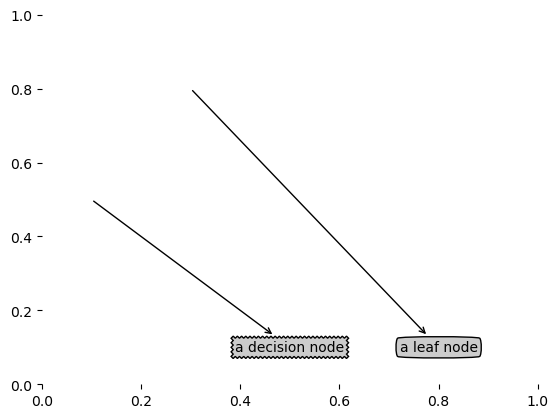

In [13]:
createPlot()#运行结果如下所示


In [14]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs


In [15]:
#获取树的层数
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth


In [16]:
def retrieveTree(i):
    listOfTrees =[{'texture': {0: {'root': {0: 'yes',
    1: {'color': {0: 'yes', 1: {'touch': {0: 'yes', 1: 'no'}}}},
    2: 'no'}},
  1: {'touch': {0: 'no', 1: 'yes'}},
  2: 'no'}},
                  {'texture': {0: {'root': {0: 'yes',
    1: {'color': {0: 'yes', 1: {'touch': {0: 'yes', 1: 'no'}}}},
    2: 'no'}},
  1: {'touch': {0: 'no', 1: 'yes'}},
  2: 'no'}}
                 ]
    return listOfTrees[i]


In [17]:
myTree = retrieveTree(0)
print(myTree)

print(myTree.keys())
print(list(myTree.keys())[0])

print('树叶节点的数目为：{}'.format(getNumLeafs(myTree)))
print('树的深度为：{}'.format(getTreeDepth(myTree)))


{'texture': {0: {'root': {0: 'yes', 1: {'color': {0: 'yes', 1: {'touch': {0: 'yes', 1: 'no'}}}}, 2: 'no'}}, 1: {'touch': {0: 'no', 1: 'yes'}}, 2: 'no'}}
dict_keys(['texture'])
texture
树叶节点的数目为：8
树的深度为：4


In [18]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')###11111111
    plt.show()


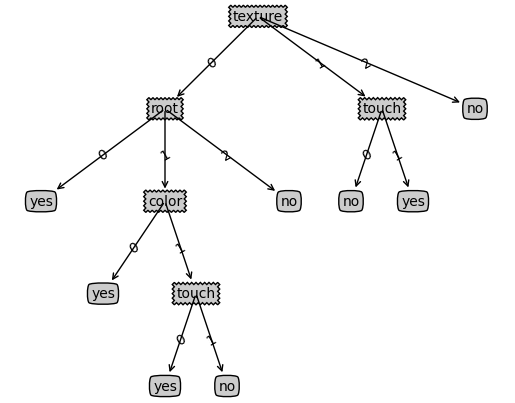

In [19]:
myTree = retrieveTree(0)
createPlot(myTree)
